Липтон был(а) продан(а) 20 раз(а) и занимает(ют) 1.9569471624266144 % от общей выручки

Черешня был(а) продан(а) 30 раз(а) и занимает(ют) 11.741682974559687 % от общей выручки

Сырники был(а) продан(а) 10 раз(а) и занимает(ют) 0.3913894324853229 % от общей выручки

Сладкая вата был(а) продан(а) 40 раз(а) и занимает(ют) 1.5655577299412915 % от общей выручки

Картофельные чипсы был(а) продан(а) 50 раз(а) и занимает(ют) 9.784735812133073 % от общей выручки

Докторская колбаса был(а) продан(а) 10 раз(а) и занимает(ют) 5.870841487279844 % от общей выручки

Кофе был(а) продан(а) 20 раз(а) и занимает(ют) 15.655577299412915 % от общей выручки

Скумбрия был(а) продан(а) 10 раз(а) и занимает(ют) 6.8493150684931505 % от общей выручки

Гранадилла был(а) продан(а) 20 раз(а) и занимает(ют) 11.741682974559687 % от общей выручки

Горчица был(а) продан(а) 10 раз(а) и занимает(ют) 0.9784735812133072 % от общей выручки

Молоко был(а) продан(а) 70 раз(а) и занимает(ют) 13.698630136986301 % от общей выручк

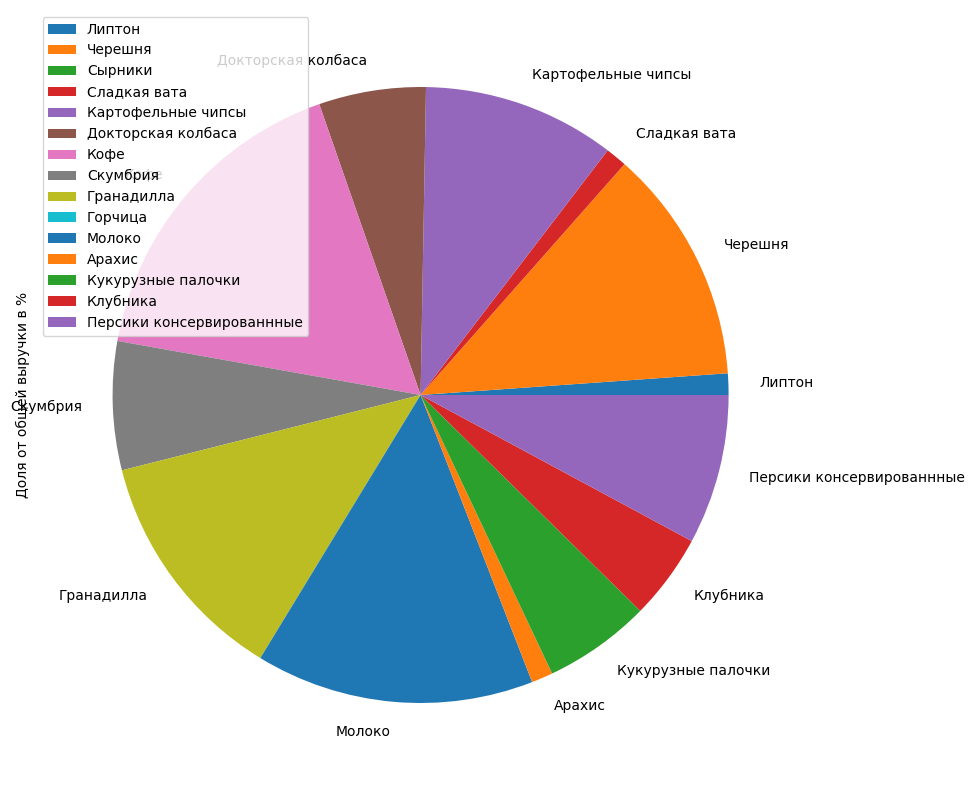

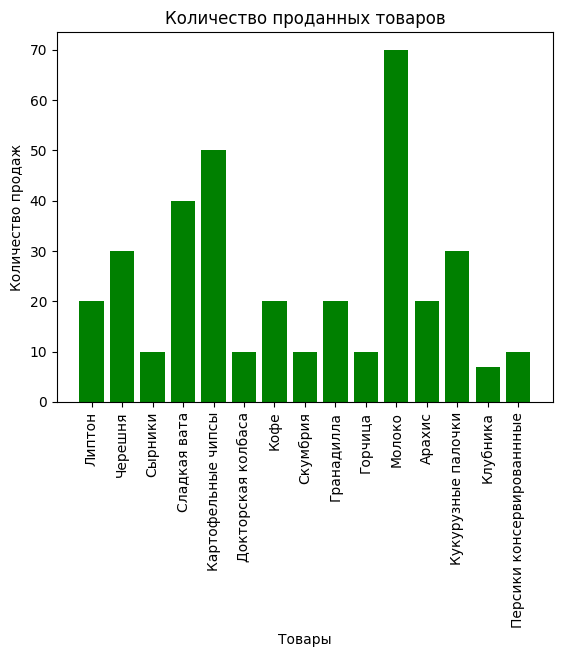

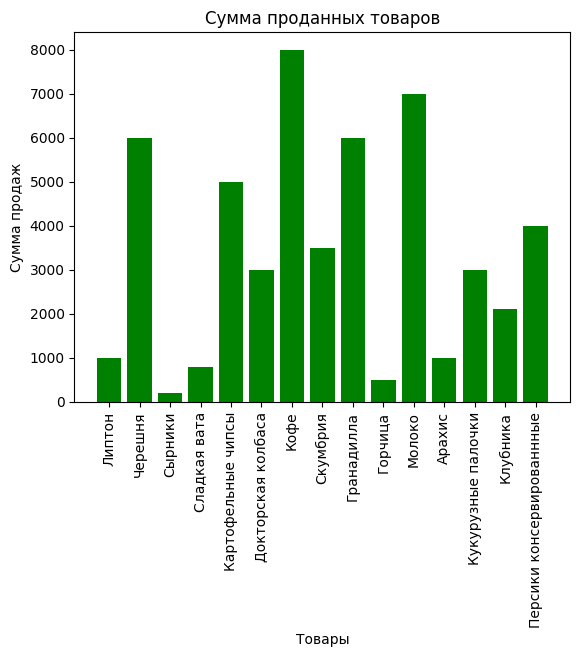

In [15]:
import matplotlib.pyplot as plt
from collections import defaultdict
import pandas as pd
import csv

products_num = defaultdict(int)

spChar = ['`','~','!','@','#','$','^','&','*','(',')','_','+','=','{','[','}','}','|',':',';','<',',','>','.','?','/', '\\']
spChar2 = ['"', "'", '%', '-']

error = True

with open("data.csv", encoding='utf-8') as r_file:
    file_reader = csv.reader(r_file, delimiter = "|")

    massiv = list(file_reader)

    for row in file_reader:
        num = int(row[4])
        name = row[2]

        products_num[name] += num

    summa = 0

    for row in massiv:
        if row != massiv[0]:
            summa += int(row[6])


            if (len(row) != 7):
                print("Файл неправильно отформатирован")
                print(row)
                error = False
                break

            try:
                int(row[0])
            except:
                print("Номер заказа не совпадает с форматом шаблона")
                print(row[0])
                error = False
                break

            try:
                str(row[1])
            except:
                print("Дата заказа неверна")
                print(row[1])
                error = False
                break

            if any((char in spChar) for char in row[2]):
                print("Название товара неверна")
                print(row[2])
                error = False
                break

            if any((char in spChar) for char in row[3]) or any((char in spChar2) for char in row[3]) or any((char.isdigit()) for char in row[3]):
                print("Категория товара неверна")
                print(row[3])
                error = False
                break

            try:
                int(row[4])
            except:
                print("Количество продаж неверно")
                print(row[4])
                error = False
                break

            try:
                float(row[5])
            except:
                print("Цена единицы товара неверна")
                print(row[5])
                error = False
                break

            try:
                float(row[6])
            except:
                print("Общая стоимость товаров неверна")
                print(row[6])
                error = False
                break
            if ((int(row[4]) * float(row[5])) != float(row[6])):
                print("Общая стоимость товара неверна")
                print(int(row[4]) * float(row[5]))
                print(float(row[6]))
                print(row)
                error = False
                break

with open("data.csv", encoding='utf-8') as r_file:
    file_reader = csv.reader(r_file, delimiter = "|")
    next(file_reader)

    for row in file_reader:
        num = int(row[4])
        name = row[2]

        products_num[name] += num

def quicksort(array):
    num = len(array)
    if num <= 1:
        return array
    pivot = array[num // 2][0]
    left = []
    middle = []
    right = []
    for info in array:
        if info[0] < pivot:
            left.append(info)
        elif info[0] > pivot:
            right.append(info)
        else:
            middle.append(info)
    return quicksort(left) + middle + quicksort(right)

    hashTable = [None] * (len(massiv) - 1)
    for i in range(len(hashTable)):
         hashTable[i] = []

    def hash(key):
        keykey = 0
        for i in key:
            keykey += ord(i)
        return int(keykey) % (len(massiv) - 1)

    def insert(key, value):
        i = hash(key)
        hashTable[i].append(value)

    for row in massiv:
        if (row != massiv[0]):
            insert(row[2], row[2])

    for i in hashTable:
        print(i)

def calculation(r_file):
    max_tovar, obh_stoimost = 0,0
    max_viruchca = ""

    max_sales = ""
    count_row = 0

    for row in r_file:
        if count_row != 0:
            if max_tovar < int(row[4]):
                max_tovar = int(row[4])
                max_sales = row[2]
            if obh_stoimost < int(row[6]):
                obh_stoimost = int(row[6])
                max_viruchca = row[2]
        count_row += 1

    return max_sales, max_viruchca

try:

    data = pd.read_csv('data.csv', sep='|')
    with open("data.csv", encoding='utf-8') as r_file:
        file_reader = csv.reader(r_file, delimiter = "|")

        for row in massiv:
            if row != massiv[0]:
                print(f'{row[2]} был(а) продан(а) {row[4]} раз(а) и занимает(ют) {(int(row[6])*100)/summa} % от общей выручки')
                print()

        print(f'Общая выручка магазина: {summa}')

        max_sales, max_viruchca = calculation(file_reader)
        print(f'Товар, который был продан наибольшее количество раз: {max_sales}')
        print(f'Товар, который принес наибольшую выручку: {max_viruchca}')

        massiv = list(file_reader)

    products_num_list = [(value, key) for key, value in products_num.items()]

    products_num_list = quicksort(products_num_list)

    print("Наиболее часто покупаемый продукт:", products_num_list[-1])

except:
    print('В файле содержатся ошибки')

data['Доля от общей выручки в %'] = data['Общая стоимость'] / (summa / 100)
data['Доля от общей выручки в %'] = data['Доля от общей выручки в %'].round(2).astype(int)
data.index = data['Название товара']

data[['Количество продаж', 'Общая стоимость', 'Доля от общей выручки в %']]

data.plot(y = 'Доля от общей выручки в %', kind = 'pie', figsize=(10,10))
plt.show()

df = pd.DataFrame(data)

X = list(df.iloc[:, 2])
Y = list(df.iloc[:, 4])

plt.bar(X, Y, color='g')
plt.title("Количество проданных товаров")
plt.xlabel("Товары")
plt.ylabel("Количество продаж")
plt.xticks(rotation='vertical')

plt.show()

df = pd.DataFrame(data)

X = list(df.iloc[:, 2])
Y = list(df.iloc[:, 6])

plt.bar(X, Y, color='g')
plt.title("Сумма проданных товаров")
plt.xlabel("Товары")
plt.ylabel("Сумма продаж")
plt.xticks(rotation='vertical')

plt.show()
